In [1]:
from ParrellelTempering import ParrallelTempering
import cupy as xp
import pickle
import matplotlib.pyplot as plt

Using GPU Acceleration


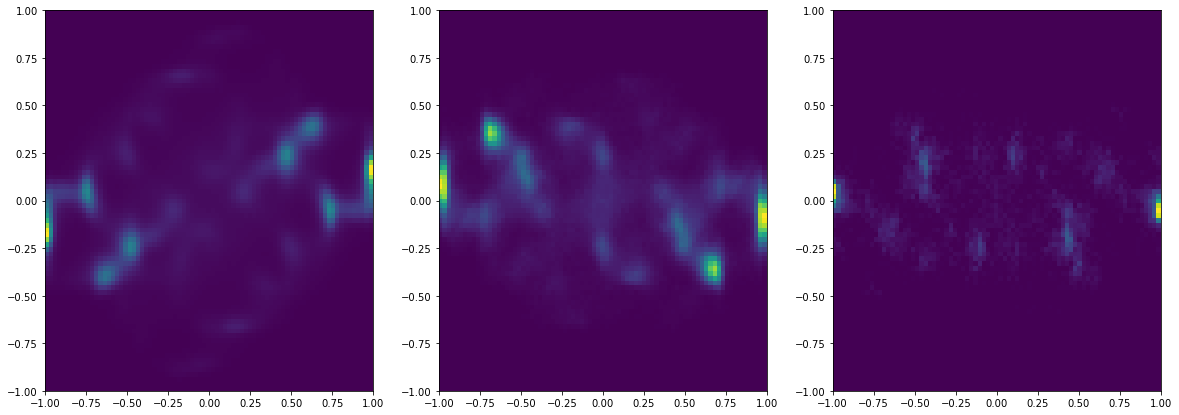

In [4]:
olap3d = xp.load("../RampRateOlap/olapRRpt.npy")
olap1d = xp.load("../RampRateOlap/olapRRannealing.npy")
olapData = xp.load("../RampRateOlap/olapRRdata.npy")

fig, axs = plt.subplots(1,3)
fig.set_figwidth(4*5)
fig.set_figheight(7)

x = xp.linspace(-1.,1.,80)
y = xp.linspace(-1.,1.,80)
X,Y = xp.meshgrid(x,y)

axs[0].pcolor(X.get(), Y.get(), olap3d.T.get())
axs[0].set_title("3D model")
axs[1].pcolor(X.get(), Y.get(), olap1d.T.get())
axs[1].set_title("1D fast annealed model")
axs[2].pcolor(X.get(), Y.get(), olapData.T.get())
axs[2].set_title("Data")

In [3]:
gs = [0.5,1.0,1.25,2.0,2.25,2.5]#[2.25, 2.5, 3.0, 5.0]
files = ["JK_7_7.npy", "JK_7_14.npy", "JK_7_18.npy", "JK_RR.npy"]

for j in range(len(files)):
    for i in range(len(gs)):
        with open(f"MetropolisRuns/3component/PT{files[j]}g={gs[i]:.2f}.pickle", "rb") as f:
            loadedmet = pickle.load(f)

        xp.save(f"MetropolisRuns/Histograms/PT{files[j]}g={gs[i]:.2f}Hist", loadedmet.angle_overlap_hist)
        xp.save(f"MetropolisRuns/Histograms/PT{files[j]}g={gs[i]:.2f}Jnonlocal", loadedmet.Jnonlocal)
        xp.save(f"MetropolisRuns/Histograms/PT{files[j]}g={gs[i]:.2f}K", loadedmet.K)
        xp.save(f"MetropolisRuns/Histograms/PT{files[j]}g={gs[i]:.2f}Jlocal", loadedmet.Jlocal)
        xp.save(f"MetropolisRuns/Histograms/PT{files[j]}g={gs[i]:.2f}Zenergy", loadedmet.Zenergy)
        xp.save(f"MetropolisRuns/Histograms/PT{files[j]}g={gs[i]:.2f}temps", loadedmet.temps)

In [5]:
loadedmet.angle_overlap_hist.shape

(50, 80, 80)

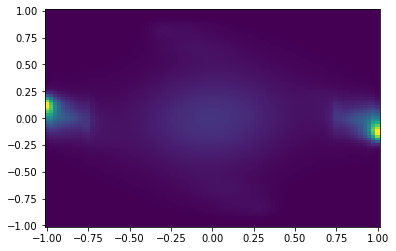

In [13]:
x = xp.linspace(-1.,1.,80)
y = xp.linspace(-1.,1.,80)
X,Y = xp.meshgrid(x,y)
plt.pcolor(X.get(), Y.get(), loadedmet.angle_overlap_hist[20].T.get())

0 0
0 1
0 2
1 0
1 1
1 2
0 0
0 1
0 2
1 0
1 1
1 2
0 0
0 1
0 2
1 0
1 1
1 2
0 0
0 1
0 2
1 0
1 1
1 2


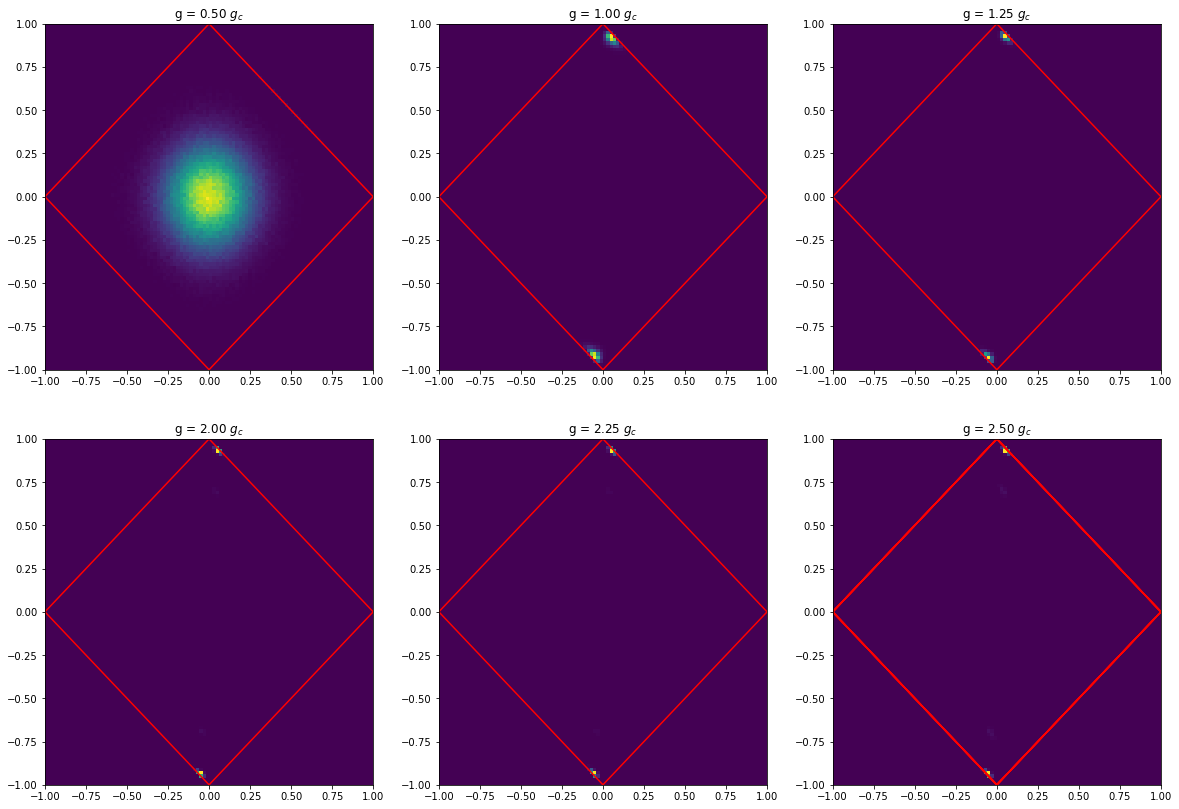

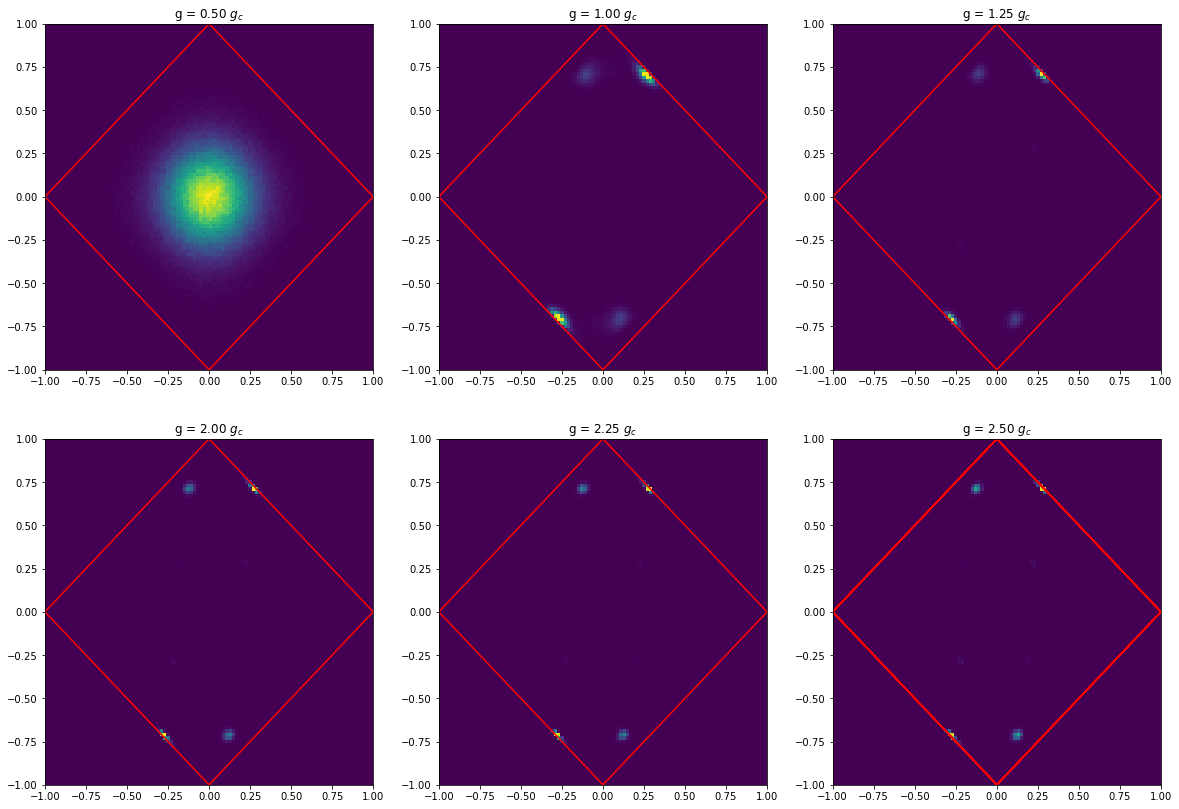

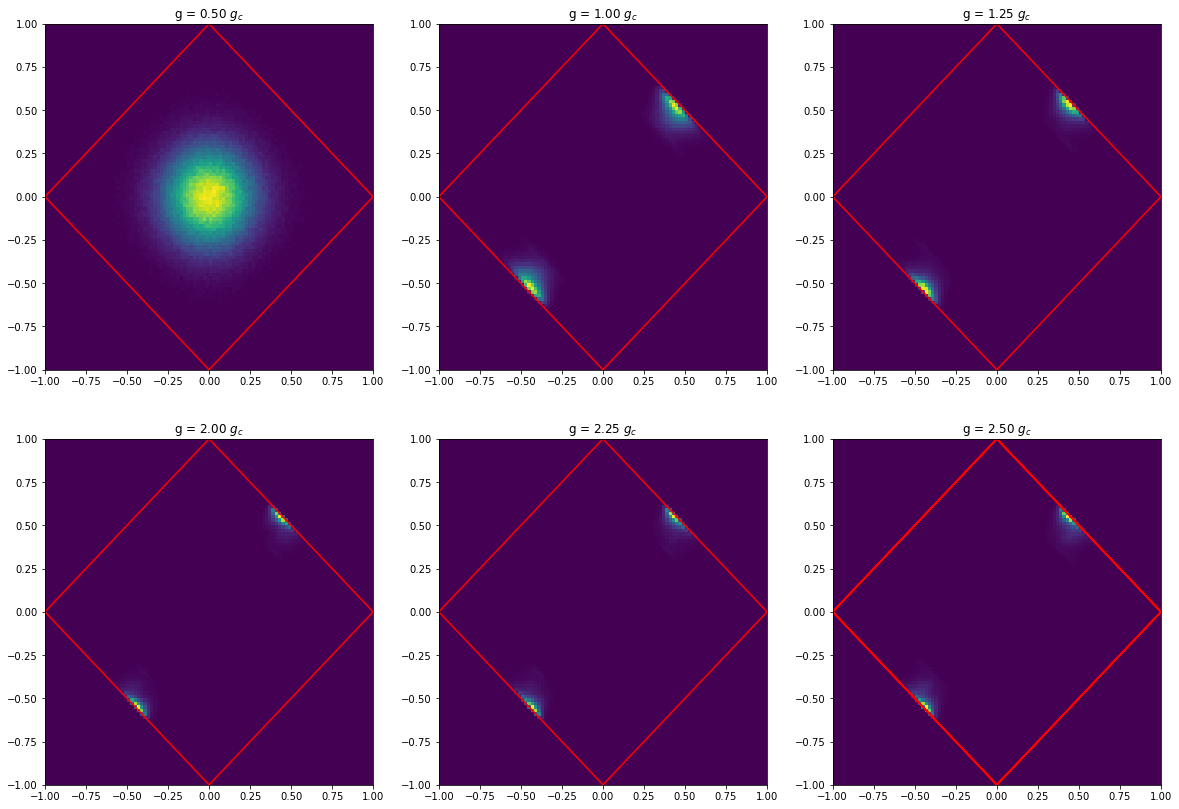

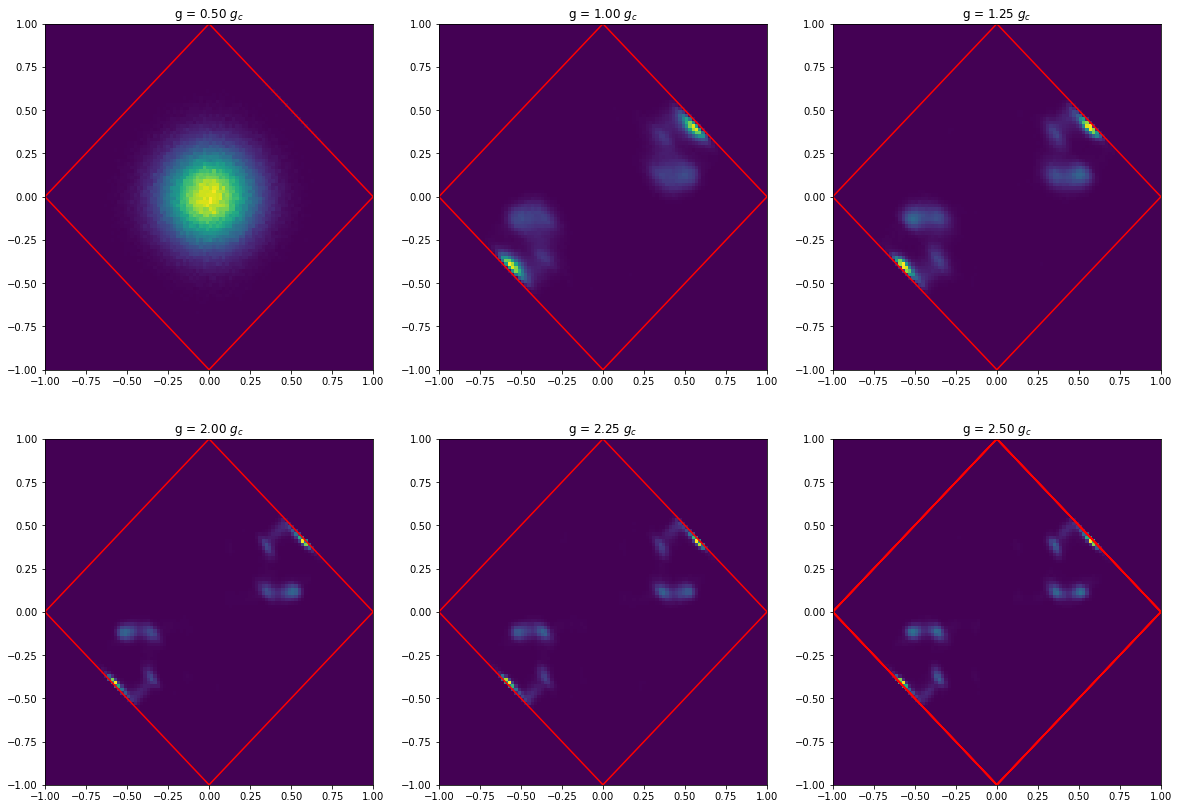

In [3]:
gs = [0.5,1.0,1.25,2.0,2.25,2.5]#[2.25, 2.5, 3.0, 5.0]
files = ["JK_7_7.npy", "JK_7_14.npy", "JK_7_18.npy", "JK_RR.npy"]

for j in range(len(files)):
    fig, axs = plt.subplots(2,3)
    fig.set_figwidth(4*5)
    fig.set_figheight(7*2)

    for i in range(len(gs)):
        with open(f"MetropolisRuns/3component/PT{files[j]}g={gs[i]:.2f}.pickle", "rb") as f:
            loadedmet = pickle.load(f)
        print(i//3, i % 3)
        ax = axs[i//3, i % 3]
        loadedmet.plot_angle_overlap_distribution(10,ax=ax)
        ax.set_title(f"g = {gs[i]:.2f}"+" $g_c$")
        ax.plot([0.0, 1.0], [1.0, 0.0], 'r-')
        ax.plot([0.0, 1.0], [-1.0, 0.0], 'r-')
        ax.plot([0.0, -1.0], [-1.0, 0.0], 'r-')
        ax.plot([0.0, -1.0], [1.0, 0.0], 'r-')

    fig.savefig(f"MetropolisRuns/Figures/PT{files[j]}SuperradiantRampT=10.pdf")

In [9]:
gs = [0.5,1.0,1.25,2.0,2.25,2.5]#[2.25, 2.5, 3.0, 5.0]
files = ["JK_7_7.npy", "JK_7_14.npy", "JK_7_18.npy", "JK_RR.npy"]

for tempNum in range(50):
    for j in range(len(files)):
        fig, axs = plt.subplots(2,3)
        fig.set_figwidth(4*5)
        fig.set_figheight(7*2)

        for i in range(len(gs)):
            with open(f"MetropolisRuns/3component/PT{files[j]}g={gs[i]:.2f}.pickle", "rb") as f:
                    loadedmet = pickle.load(f)
            print(i//3, i % 3)
            ax = axs[i//3, i % 3]
            loadedmet.plot_angle_overlap_distribution(tempNum,ax=ax)
            ax.set_title(f"g = {gs[i]:.2f}"+" $g_c$")
            ax.plot([0.0, 1.0], [1.0, 0.0], 'r-')
            ax.plot([0.0, 1.0], [-1.0, 0.0], 'r-')
            ax.plot([0.0, -1.0], [-1.0, 0.0], 'r-')
            ax.plot([0.0, -1.0], [1.0, 0.0], 'r-')

        fig.savefig(f"MetropolisRuns/Figures/PT{files[j]}SuperradiantRampT={tempNum}.pdf")

0 0
0 1
0 2


In [8]:
xpos = xp.load("J_Matrix_Positions/allX.npy")

In [9]:
xpos.shape

(130, 8)